
# Singular Value Decomposition o  pa la banda Descomposición de Valores Singulares

#### La SVD nos ayuda a descomponer una matriz no cuadrada!! 👌🏼

### Nos va a dar como resultado 3 matrices $U$, $D$, $V$

#### Donde $U$ y $V$ son matrices que pueden ser o no cuadradas y no afuerza de las mimas dimensiones
#### $U$ Una matriz de _**Rotación**_ con valores singulares izquierdos
#### $V$ Otra matriz de _**Rotación**_ con valor4es singulares derechos
#### $D$ es una matriz Diagonal, con todos los _**Valores singulares que calculamos**_


El resultado sería una matriz M que se obtiene de $U · D · V$

·····



![svd](https://miro.medium.com/max/700/1*6wkgGgBy2NLVmRVOw8K86w.png)


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
LOKI = np.array([[1,2,3],[3,4,5]])
LOKI

array([[1, 2, 3],
       [3, 4, 5]])

In [78]:
U,D,V = np.linalg.svd(LOKI)

In [74]:
U

array([[-0.46410668, -0.88577931],
       [-0.88577931,  0.46410668]])

In [71]:
D_diag = np.diag(D)
D_diag

array([[7.97638869, 0.        ],
       [0.        , 0.61418515]])

In [72]:
V

array([[-0.39133557, -0.5605708 , -0.72980603],
       [ 0.8247362 ,  0.13817999, -0.54837623],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [ ]:
U.dot(D_diag).dot(V)

In [84]:
def SVD(A):
    U,D,V = np.linalg.svd(A)
    D = np.diag(D)
    
    if D.shape[1] != V.shape[0]:
        n_columns = np.abs(D.shape[0]-V.shape[0])
        extend = np.zeros(( D.shape[0] , n_columns ))
        D = np.append(D, extend, axis=1)
    return U,D,V

In [85]:
U = SVD(LOKI)[0]
V = SVD(LOKI)[2]
D = SVD(LOKI)[1]
U.dot(D).dot(V)

array([[1., 2., 3.],
       [3., 4., 5.]])

In [89]:
B = np.random.randint(1, 5, size=(3,4))
B

array([[1, 2, 3, 1],
       [3, 2, 1, 3],
       [1, 3, 3, 2]])

In [90]:
U = SVD(B)[0]
V = SVD(B)[2]
D = SVD(B)[1]
U.dot(D).dot(V)

array([[1., 2., 3., 1.],
       [3., 2., 1., 3.],
       [1., 3., 3., 2.]])

In [86]:
proof = np.array([[1, 1.5],[0, 1]])
proof

array([[1. , 1.5],
       [0. , 1. ]])

In [91]:
U, D, V = np.linalg.svd(proof)
diagonal = np.diag(D)
U, diagonal, V

(array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]),
 array([[2. , 0. ],
        [0. , 0.5]]),
 array([[ 0.4472136 ,  0.89442719],
        [-0.89442719,  0.4472136 ]]))

In [88]:
U.dot(diagonal).dot(V)

array([[1. , 1.5],
       [0. , 1. ]])

In [ ]:
from matplotlib.patches import Polygon
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

In [92]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
Square

array([[0, 0, 1, 1],
       [0, 1, 1, 0]])

In [93]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

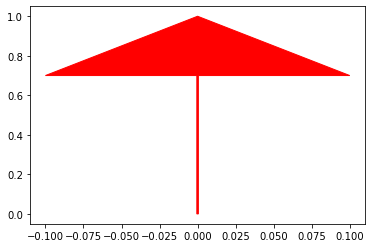

In [94]:
plot_vector(Square[0].flatten(), color="r")
plot_vector(Square[1].flatten(), color="r")

In [ ]:
plot_transformation(Square, V.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

In [ ]:
plot_transformation(V.dot(Square), diagonal.dot(V).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

In [ ]:
plot_transformation(diagonal.dot(V).dot(Square), U.dot(diagonal).dot(V).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

## MUCHO SVD!!!


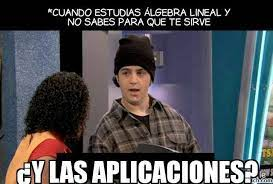

In [ ]:
!pip install surprise

In [ ]:
from surprise import SVDpp
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

In [64]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
df_movies = ratings.merge(movies, on="movieId", how="left")

In [ ]:
df_movies

In [ ]:
df_movies_to_model = df_movies[df_movies.columns[:-3]]
df_movies_to_model

In [68]:
## Obteniendo nuestros datos en el formato que queremos
reader = Reader()
data = Dataset.load_from_df(df_movies_to_model[df_movies.columns[:-3]], reader)

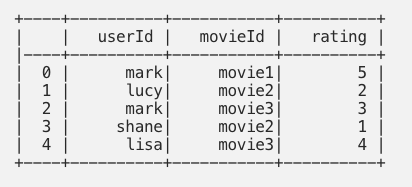
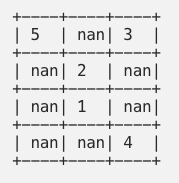

In [ ]:
print(data)

In [ ]:
train, test = train_test_split(data, test_size=0.20)
svd = SVDpp()

In [ ]:
# Entrenando nuestros datos así llenos
svd.fit(train)

In [ ]:
preds = svd.test(test)
preds

In [ ]:
accuracy.mae(preds)

In [ ]:
accuracy.rmse(preds)

### Ahora si los datos a FULL

In [67]:
trainfull = data.build_full_trainset()

svd = SVDpp()
svd.fit(trainfull)

svd.predict(uid=1, iid=1)

Prediction(uid=1, iid=1, r_ui=None, est=4.795707607243091, details={'was_impossible': False})

### Creando la funcion de sistema de recomendaciones

In [ ]:
def recommend_system(userId, dataframe, algorithm, n_commends):
    """
with the parameters, returns back the top n recommends movies.

Parameters
-----------

userId: the user ID of the person that we want recommendations

dataframe: the DataFrame of movies.

algorithm: the algorith used to recommend movies.

n_commends: the number of movies recommended.


return
------

ID of movies that a specific user will like.

    """
    movie_ids = dataframe['movieId'].to_list()
    movies_watched = dataframe[dataframe["userId"] == userId]["movieId"]
    movies_no_watched = [movie for movie in movie_ids if movie not in movies_watched]

    preds = [algorithm.predict(uid=userId, iid=movie) for movie in movies_no_watched]
    commends_ratting = {pred[1]:pred[3] for pred in preds}
    order_dict = {k: v for k, v in sorted(commends_ratting.items(), key=lambda item: item[1])}

    top_predictions = list(order_dict.keys())[:n_commends]

    return dataframe[dataframe["movieId"].isin(top_predictions)][["title", "genres"]].drop_duplicates()

In [100]:
movies_recommended = recommend_system(9, df_movies, svd, 5)
print("ID of the movies recommended:", movies_recommended)

ID of the movies recommended:                                 title                   genres
697    Stuart Saves His Family (1995)                   Comedy
981                   Catwoman (2004)     Action|Crime|Fantasy
2554   Speed 2: Cruise Control (1997)  Action|Romance|Thriller
14369              Spice World (1997)                   Comedy
26886                  Jason X (2002)   Horror|Sci-Fi|Thriller


### Tiene sentido??

In [96]:
def check_movies_user(userId, dataframe, n):
    return dataframe[dataframe["userId"] ==userId].sort_values("rating", ascending=False)[:n]

In [101]:
print(f"Movies user likes:", check_movies_user(9, df_movies, 5))

Movies user likes:       userId  movieId  rating   timestamp  \
1111       9     5902     5.0  1044656934   
1082       9     1198     5.0  1044656716   
1112       9     5952     5.0  1044656908   
1089       9     2300     5.0  1044657072   
1103       9     5481     5.0  1044656836   

                                                  title                genres  
1111                                  Adaptation (2002)  Comedy|Drama|Romance  
1082  Raiders of the Lost Ark (Indiana Jones and the...      Action|Adventure  
1112      Lord of the Rings: The Two Towers, The (2002)     Adventure|Fantasy  
1089                              Producers, The (1968)                Comedy  
1103                 Austin Powers in Goldmember (2002)                Comedy  
